<h3>Klasifikasi kanker apakah termasuk tipe jinak (benign) atau (malignant) pada dataset Breast Cancer Wisconsin

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

<h4>Data Loading

In [2]:
df = pd.read_csv('Pertemuan 8/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


<h4>Exploratory Data Analysis

In [3]:
#check feature
print('Total rows:', df.shape[0])
print('Total features:', df.shape[1])

Total rows: 569
Total features: 33


In [4]:
#check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# check missing value
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

terdapat missing value pada kolom 'Unnamed: 32' yang nantinya akan kita handle pada data preprocessing

In [6]:
#check duplicate data
df.duplicated().sum()

0

tidak ada duplikasi data

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


<h4>Visualisasi Data

In [8]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

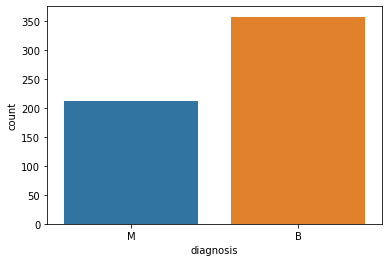

In [9]:
sns.countplot(data=df, x='diagnosis')
plt.show()

Text(0.5, 1.0, 'Correlation Factors Heat Map')

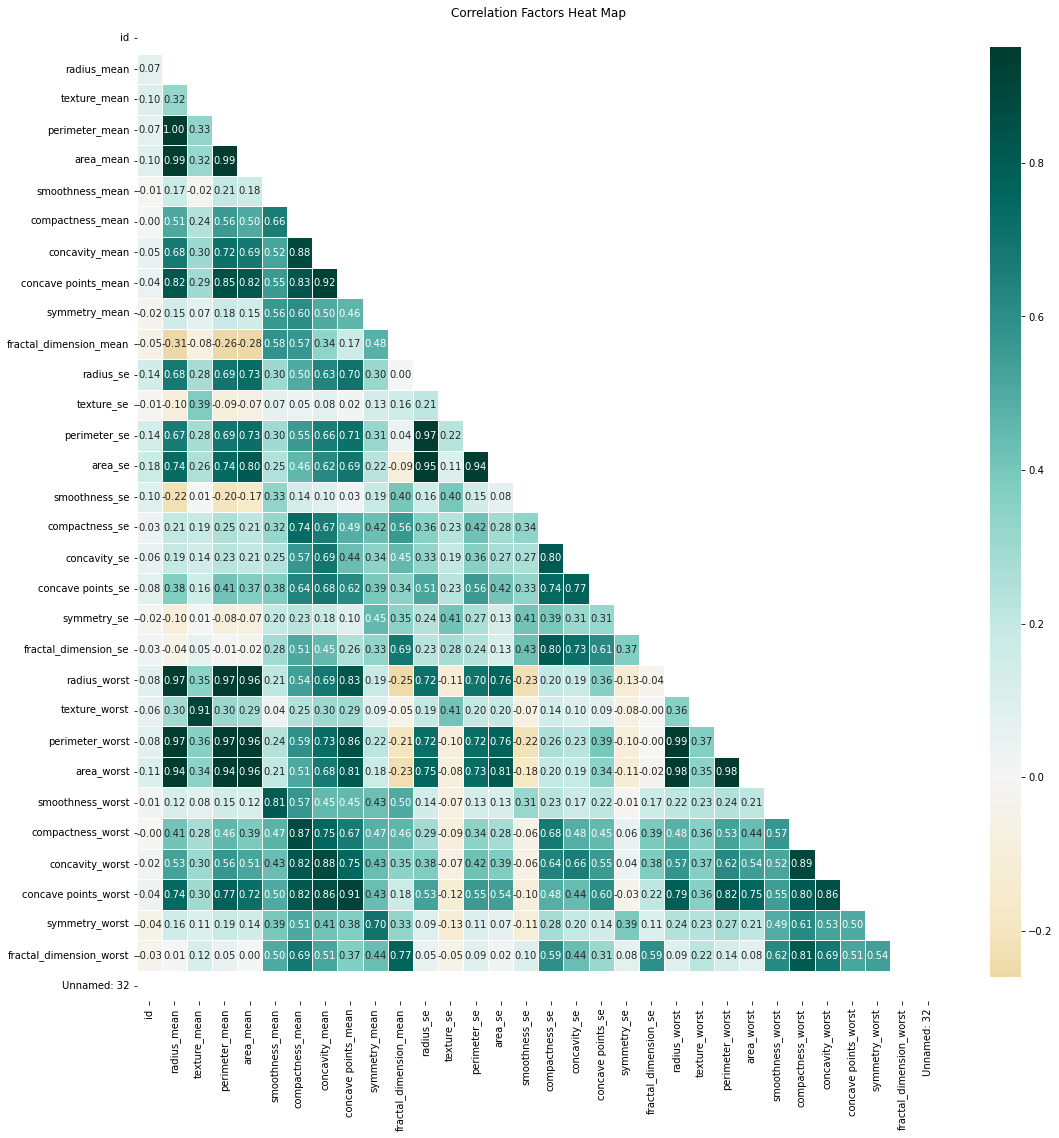

In [10]:
import klib
klib.corr_plot(df, annot=True, figsize = (18,18)).set_title('Correlation Factors Heat Map')

<h4>Data Preprocessing

In [11]:
#copy terlebih dahulu data aslinya
df_cancer = df.copy()
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


- Kita akan drop 2 kolom yaitu 'id' karena tidak memeliki informasi yang akan digunakan untuk klasifikasi dan kolom 'Unnamed: 32' karena semua data berisi 'NaN'

In [12]:
# drop feature 'id' and 'Unnamed: 32'
df_cancer=df_cancer.drop(['id','Unnamed: 32'],axis=1)
df_cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


- Pada kolom diagnosis berisi karakter 'M' dan 'B', maka akan kita ubah menjadi 1 dan 0

In [13]:
df_cancer['diagnosis'] = df_cancer['diagnosis'].replace(['M', 'B'], [1,0])
df_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Handling Outlier

In [14]:
def threshold(z,d):
    for i in np.arange(3,5,0.2):
        data=d.copy()
        data=data[(z<i).all(axis=1)]
        loss=(d.shape[0]-data.shape[0])/d.shape[0]*100
        print('With threshold {} data loss is {}%'.format(np.round(i,1),np.round(loss,2))) 

In [15]:
from scipy.stats import zscore
z=np.abs(zscore(df_cancer[df_cancer.columns]))
threshold(z,df_cancer[df_cancer.columns])

With threshold 3.0 data loss is 13.01%
With threshold 3.2 data loss is 10.72%
With threshold 3.4 data loss is 9.14%
With threshold 3.6 data loss is 7.73%
With threshold 3.8 data loss is 6.68%
With threshold 4.0 data loss is 5.98%
With threshold 4.2 data loss is 5.27%
With threshold 4.4 data loss is 4.39%
With threshold 4.6 data loss is 3.69%
With threshold 4.8 data loss is 2.99%


In [16]:
df_cancer_clear=df_cancer[(z<3.0).all(axis=1)]

In [17]:
df_cancer_clear.shape[0]

495

Prepare Features & Labels

In [18]:
data_cancer = df_cancer_clear.copy()
data_vars = data_cancer.columns.values.tolist()
y = ['diagnosis']
x = [i for i in data_vars if i not in y]

Splitting Data

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data_cancer[x], data_cancer[y], test_size = 0.3, random_state=19)

print('Shape data training: ', x_train.shape)
print('Shape data testing: ', x_test.shape)

Shape data training:  (346, 30)
Shape data testing:  (149, 30)


Normalize (Min Max Scaler)

In [20]:
from sklearn.preprocessing import MinMaxScaler

mx = MinMaxScaler()
mm = mx.fit_transform(x_train)

x_train = mx.transform(x_train)
x_test = mx.transform(x_test)

<h4>Data Modelling

1. Logistic Regression

        Train Model

In [21]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

        Test Model

In [24]:
logreg_score = logreg.score(x_test, y_test)
print('Model Accuracy:', logreg_score)

Model Accuracy: 0.9731543624161074


In [25]:
y_pred_logreg = logreg.predict(x_test)
y_pred_logreg

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

In [26]:
y_train_pred_logreg = logreg.predict(x_train)
y_test_pred_logreg= logreg.predict(x_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

print('Logistic Regression Training Result:')
print('======================================================')
print('Accuracy:', logreg.score(x_train, y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred_logreg))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred_logreg))

Logistic Regression Training Result:
Accuracy: 0.9682080924855492
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       233
           1       0.98      0.92      0.95       113

    accuracy                           0.97       346
   macro avg       0.97      0.96      0.96       346
weighted avg       0.97      0.97      0.97       346

Confussion Matrix ------------------------------------
[[231   2]
 [  9 104]]


In [42]:
print('Logistic Regression Testing Result:')
print('======================================================')
print('Accuracy:', logreg.score(x_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred_logreg))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred_logreg))

Logistic Regression Testing Result:
Accuracy: 0.9731543624161074
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        99
           1       1.00      0.92      0.96        50

    accuracy                           0.97       149
   macro avg       0.98      0.96      0.97       149
weighted avg       0.97      0.97      0.97       149

Confussion Matrix ------------------------------------
[[99  0]
 [ 4 46]]


Ket : Dari hasil nilai f1-score menggunakan model logistic regression untuk data training dan testing terjadi overfitting dengan perbandingan score 96% (train) dan 97% (test)

2. Support Vector Machine (SVM)

In [30]:
from sklearn import svm
from sklearn.svm import SVC

svm_model = SVC(kernel = 'rbf', C=1, gamma = 'auto', random_state = 19)
svm_model.fit(x_train, y_train)

SVC(C=1, gamma='auto', random_state=19)

        Evaluate model

In [31]:
svm_model.score(x_test, y_test)

0.9395973154362416

        Hyperparameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV

params = { 'C' : [0.5, 1, 10, 100, 1000],
          'gamma' : [0.1, 0.01, 0.001],
          'kernel' : ['poly', 'rbf']    
}

g = GridSearchCV(SVC(), params, cv = 2)

g.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.5, 1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['poly', 'rbf']})

In [33]:
print(g.best_params_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}


In [34]:
best_params = g.best_params_
svm_clf = SVC(**best_params)

In [35]:
svm_clf.fit(x_train, y_train)

SVC(C=1000, gamma=0.01)

In [36]:
svm_clf.score(x_test, y_test)

0.9865771812080537

In [37]:
y_pred_svm = svm_clf.predict(x_test)
y_pred_svm

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [38]:
y_train_pred_svm = svm_clf.predict(x_train)
y_test_pred_svm= svm_clf.predict(x_test)

In [39]:
print('SVM Training Result:')
print('======================================================')
print('Accuracy:', svm_clf.score(x_train, y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred_svm))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred_svm))

SVM Training Result:
Accuracy: 0.9884393063583815
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       233
           1       1.00      0.96      0.98       113

    accuracy                           0.99       346
   macro avg       0.99      0.98      0.99       346
weighted avg       0.99      0.99      0.99       346

Confussion Matrix ------------------------------------
[[233   0]
 [  4 109]]


In [40]:
print('SVM Testing Result:')
print('======================================================')
print('Accuracy:', svm_clf.score(x_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred_svm))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred_svm))

SVM Testing Result:
Accuracy: 0.9865771812080537
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        99
           1       1.00      0.96      0.98        50

    accuracy                           0.99       149
   macro avg       0.99      0.98      0.98       149
weighted avg       0.99      0.99      0.99       149

Confussion Matrix ------------------------------------
[[99  0]
 [ 2 48]]


Ket : Dari hasil nilai f1-score menggunakan model SVM didapatkan hasil sebanyak 99% untuk data training dan 98% untuk data testing

Random Forest

        Train model

In [43]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

        Test model

In [49]:
rf_score = rf_clf.score(x_test, y_test)
print('Model Accuracy:', rf_score)

Model Accuracy: 0.9463087248322147


In [50]:
y_train_pred_rf = rf_clf.predict(x_train)
y_test_pred_rf = rf_clf.predict(x_test)

In [51]:
print('Random Forest Training Result:')
print('======================================================')
print('Accuracy:', rf_clf.score(x_train, y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred_rf))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred_rf))

Random Forest Training Result:
Accuracy: 1.0
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       233
           1       1.00      1.00      1.00       113

    accuracy                           1.00       346
   macro avg       1.00      1.00      1.00       346
weighted avg       1.00      1.00      1.00       346

Confussion Matrix ------------------------------------
[[233   0]
 [  0 113]]


In [48]:
print('Random Forest Testing Result:')
print('======================================================')
print('Accuracy:', rf_clf.score(x_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred_rf))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred_rf))

Random Forest Testing Result:
Accuracy: 0.9463087248322147
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        99
           1       0.96      0.88      0.92        50

    accuracy                           0.95       149
   macro avg       0.95      0.93      0.94       149
weighted avg       0.95      0.95      0.95       149

Confussion Matrix ------------------------------------
[[97  2]
 [ 6 44]]


        Check confusion matrix

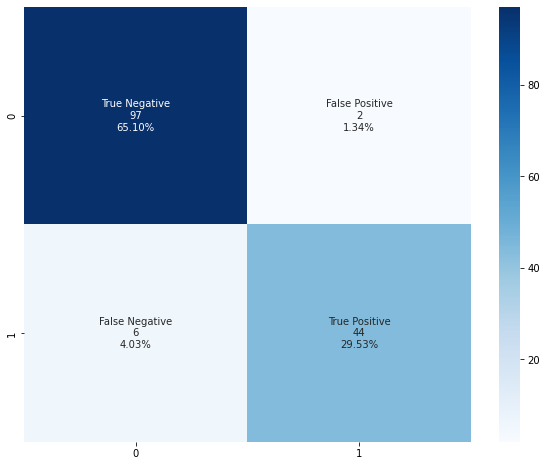

In [52]:
#y_pred_rf = rf_clf.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_test_pred_rf)

group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()

Ket : Dari hasil nilai f1-score menggunakan model Random Forest didapatkan hasil sebanyak 100% pada data training dan 94% pada data testing

Kesimpulan :

Dari hasil prediksi menggunakan model algoritma logistic regression, svm dan random forest didapatkan hasil f1_score yang berdeda-beda. Diantara ketiga model tersebut, hasil prediksi dari algoritma svm dan random forest bisa dikatakan lebih baik untuk digunakan jika dibandingkan logistic regression yang terdapat overfitting dalam proses pemodelannya 